# Problem Definition

Given product dataset $D$, 

user dataset $W$. 

A product $p$'s score corresponding to a user $w$ is the dot product $p\cdot w$. 

If a product $p$ ranks top-k respecting to user $w$, then $p$ covers $w$. 

Create a product that maximize the cover ratio of users under the constrain $C(p)\leq B$,

where $C(p)=\Sigma p[i]$.

# Assuming we are solving a 2d problem

# Preprocessing


Suppose $S_{ik}$ means the $i_{th}$ score of user $w_i$,

$p$ needs to satisfy $w_i\cdot p\ge S_{ik}$ in order to cover $w_i$. 

Lemma 1:

only consider C(p)=B as candidate space

Lemma 2:

Before $CellTree$ insertion, remove users that $w_i\cdot p=S_{ik}$ doesn't intersect with $C(p)=B$ (i.e., remove purple and red lines)

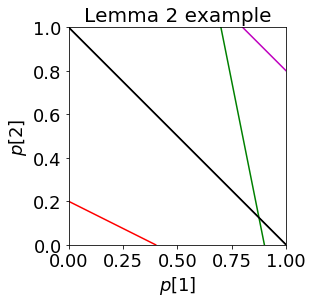

In [19]:
intersect_exam()

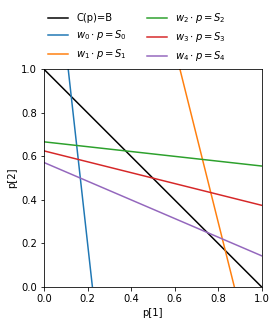

In [34]:
w_1=[0.9, 0.1]
w_2=[0.8, 0.2]
w_3=[0.1, 0.9]
# w_4=[0.2, 0.8]
w_5=[0.3, 0.7]
ws=[w_1, w_2, w_3, w_4, w_5]

S_iks=[0.2, 0.7, 0.6, 0.5, 0.4]
plot_halfspace(ws, S_iks)

# 上下界的定义

在我们这个问题里， 要返回那个cover用户数目最多的product region

Cell Tree的每个cell 都代表某个product区域

cell的上界就是指对于这个cell的任意product都应该覆盖不多于“上界”个用户

cell的下界就是指对于这个cell， 至少存在一个product覆盖的用户数大于或等于"下界"个用户

而事实上我们可以把$h_i^+$看作一个cell

$h_i^+$的上下界与cell的上下界定义相同


Lemma i1:

我们问题要找的是最优解， 最优解所在叶节点设其为$Cell_{opt}$

假如最优解在

In [53]:
import matplotlib.pyplot as plt
import numpy as np


def plot_user(user, save=False, fn='', format='pdf'):
    fig, ax = plt.subplots()
    user_a = np.array(user).T
    ax.scatter(user_a[0], user_a[1])
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_user(user)
    else:
        plt.show()


def plot_pdt(pdt, save=False, fn='', format='pdf'):
    plot_user(pdt, save, fn, format)


def plot_halfspace(r, c, save=False, fn='', format='pdf'):
    fig, ax = plt.subplots()
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.plot([0, 1], [1, 0], c='black', label=r'C(p)=B')
#     ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    for i in range(len(r)):
        row = r[i]
        if row[0] == 0 or row[1] == 0:
            continue
        ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], label=r'$w_'+r'%d'%(i+1)+r'\cdot p=S_{'+r'%d'%(i+1)+r'}$')
    ax.legend(
loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False
    )
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_halfspace(r, c)
    else:
        plt.show()


def plot_pdt_hs(pdt, pdt_p, pdt_c, r, c, covered=set(), save=False, fn='', format='pdf'):
    fig, ax = plt.subplots()
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    for i in range(len(r)):
        row = r[i]
        if row[0] == 0 or row[1] == 0:
            continue
        if i in covered:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], alpha=0.2, c='cyan')
        else:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]],  alpha=0.2, c='orange')
    pdtT = pdt.T
    ax.scatter(pdtT[0], pdtT[1], c='grey', s=10)
    ax.scatter(pdt[pdt_p, 0], pdt[pdt_p, 1], c='blue', s=10)
    ax.scatter(pdt[pdt_c, 0], pdt[pdt_c, 1], c='red', s=30)
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_pdt_hs(pdt, pdt_p, pdt_c, r, c, covered)
    else:
        plt.show()


def plot_pdt_inter_hs(r, c, cost, B, inter=set(), save=False, fn='', format='pdf'):
    fig, ax = plt.subplots()
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.plot([B / cost[0], 0], [0, B / cost[1]], c='black', linewidth=3)
    for i in range(len(r)):
        row = r[i]
        if row[0] == 0 or row[1] == 0:
            continue
        if i in inter:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], alpha=0.3, c='orange')
        else:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], alpha=0.3, c='cyan')
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_pdt_inter_hs(r, c, cost, B, inter)
    else:
        plt.show()


def plot_inters(inter_cnt, save=False, fn='', format='pdf'):
    fig, ax = plt.subplots()
    ax.set_xlabel('B')
    ax.set_ylabel('Intersect halfspaces')
    tmp = np.array(inter_cnt).T
    x = [1 + i / 10 for i in range(10)]
    labels = ['uniform', 'anti', 'corr']
    style = ['bo-', 'y^-', 'rP-']

    for i in range(tmp.shape[0]):
        ax.plot(x, tmp[i], style[i], label=labels[i], mfc='none')
    # ax.set_yscale('log')
    ax.legend()
    if save:
        plt.savefig(fn + '.'+format, format=format)
        plot_inters(inter_cnt, save=False)
    else:
        plt.show()

def plot_halfspace3(r, save=False, fn='', format='svg'):

    fig, ax = plt.subplots()
    ax.set_xlabel(r'$p[1]$', fontsize=18)
    ax.set_ylabel(r'$p[2]$', fontsize=18)
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    c=['r','black',  'g', 'm']
    for i in range(len(r)):
        row = r[i]
        if i==0:
            label=r'$w_1\cdot p=S_{1k}$'
        if i==1:
            label=r'$w_2\cdot p=S_{2k}$'
        if i==2:
            label=r'$w_3\cdot p=S_{3k}$'
        ax.plot(row[0], row[1], c=c[i], label=label)
    ax.plot([0, 1],[1, 0], c='black',zorder=105)
    ax.tick_params('x', labelsize=18)
    ax.tick_params('y', labelsize=18)
    plt.title('Lemma 2 example', fontsize=20)
#     ax.legend()
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
#         plot_halfspace(r, c)
    else:
        plt.show()
def intersect_exam():
    row=[
    [[0, .4], [.2, 0]],
    [[1, 0], [0, 1]],
    [[.7, .9], [1, 0]],
    [[.8, 1], [1, .8]]
    ]
    plot_halfspace3(row, save=False, fn='inter2d', format='svg')


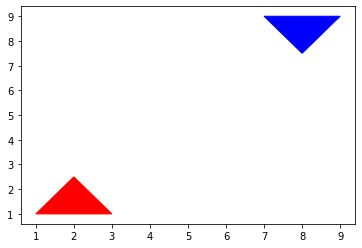

In [45]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.array([[1,1], [2,2.5], [3, 1], [8, 7.5], [7, 9], [9, 9]])
Y = ['red', 'red', 'red', 'blue', 'blue', 'blue']

plt.figure()
plt.scatter(X[:, 0], X[:, 1],s=0, color = Y[:])

t1 = plt.Polygon(X[:3,:], color=Y[0])
plt.gca().add_patch(t1)

t2 = plt.Polygon(X[3:6,:], color=Y[3])
plt.gca().add_patch(t2)

plt.show()

ValueError: mask array must have same length as triangles array

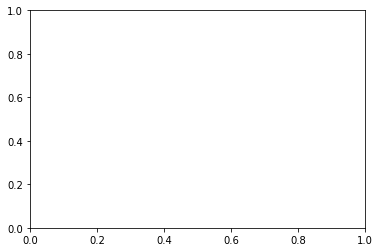

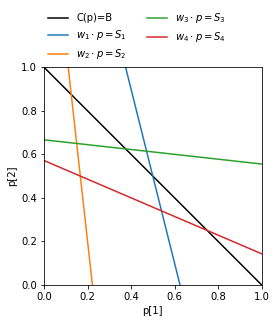

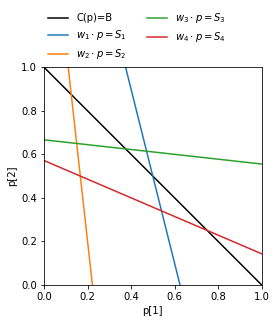

In [56]:
w_1=[0.9, 0.1]
w_2=[0.8, 0.2]
w_3=[0.1, 0.9]
# w_4=[0.2, 0.8]
w_5=[0.3, 0.7]
# ws=[w_1, w_2, w_3, w_4, w_5]
ws=[w_2, w_1, w_3, w_5]

S_iks=[0.5, 0.2, 0.6, 0.4]
plot_halfspace(ws, S_iks, save=True, fn='L7_edmo', format='svg')